In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/minor-project"

/content/drive/MyDrive/minor-project


# **IMPORTING REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import IPython.display as ipd
import librosa.display
import seaborn as sns

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# **IMPORTING AND VISUALIZING THE DATASET**

In [ ]:
dataset = pd.read_csv('songGenre-Dataset/features_3_sec.csv')

In [ ]:
dataset.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
dataset.shape

(9990, 60)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

**EXPLORING AUDIO DATA**

we will use `Librosa` for understanding audio data


In [ ]:
import os
general_path= "songGenre-Dataset"
print(list(os.listdir(f'{general_path}/genres_original/')))

['metal', 'reggae', 'classical', 'blues', 'jazz', 'hiphop', 'rock', 'country', 'disco', 'pop']


In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/hiphop/hiphop.00004.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [ 0.28173828  0.29385376  0.29632568 ... -0.23587036 -0.24591064
 -0.29406738] 

y shape: (661504,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [ ]:
#Trim leading and trailing silence from an audio signal(silence and before the actual audio)
audio_file,_=librosa.effects.trim(y)
#the result in a Numpy ndarray
print('Audio File:',audio_file,'\n')
print('Audio File shape:',np.shape(audio_file))

Audio File: [ 0.28173828  0.29385376  0.29632568 ... -0.23587036 -0.24591064
 -0.29406738] 

Audio File shape: (661504,)


**2-D REPRESENTATION OF SOUND WAVES**

Text(0.5, 1.0, 'Sound Waves in HipHop 00004')

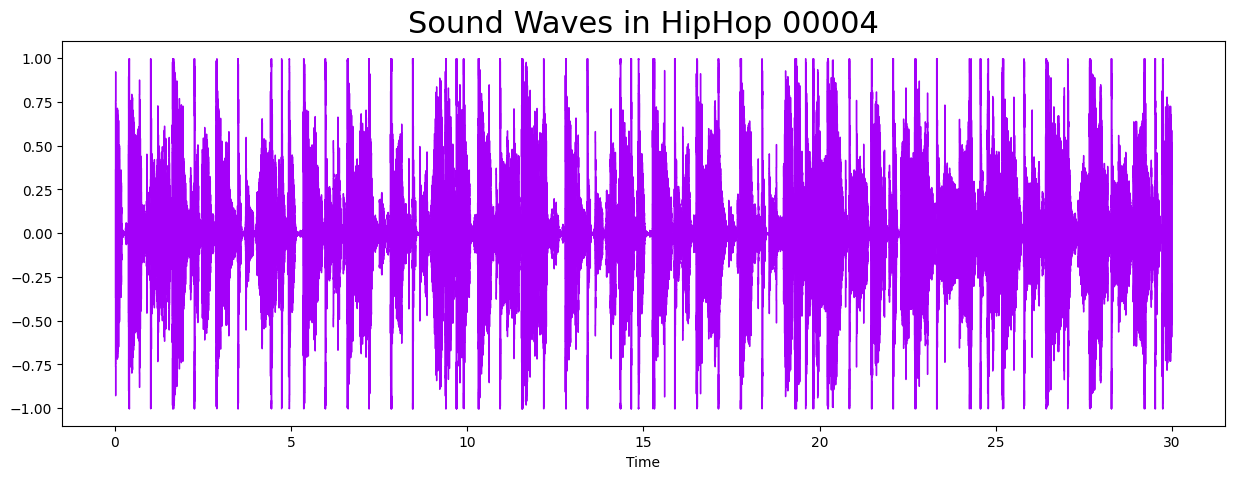

In [ ]:
plt.figure(figsize = (15, 5))
librosa.display.waveshow(y=audio_file,sr = sr,color="#A300F9")
plt.title("Sound Waves in HipHop 00004",fontsize=22)

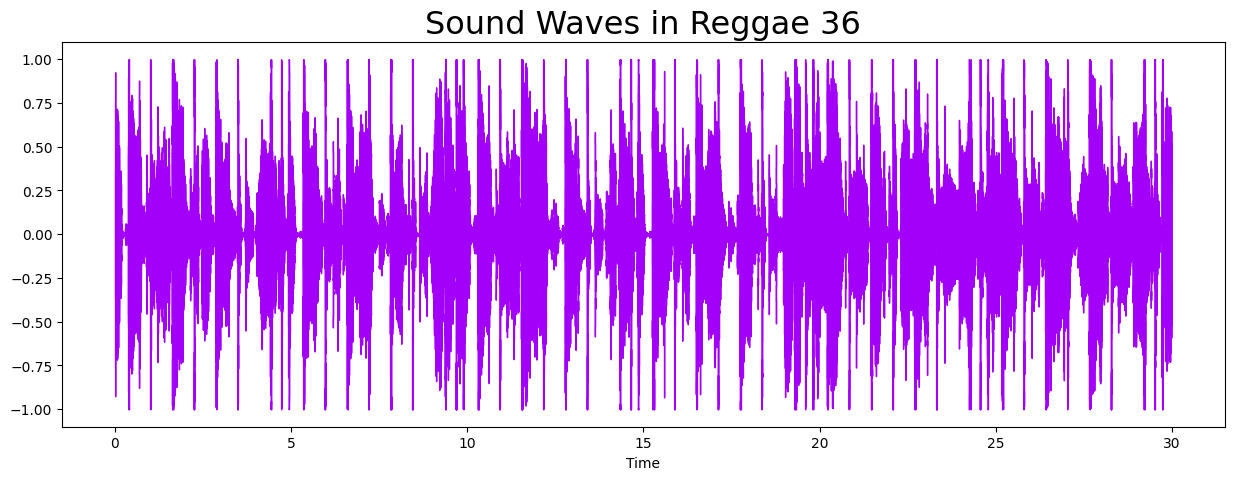

In [ ]:
plt.figure(figsize = (15, 5))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9")
plt.title("Sound Waves in Reggae 36", fontsize = 23)

**FOURIER TRANSFORM**
1. Function that gets a signal in the time domain as input, and outputs its decomposition into frequencies
2. Transform both the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels, which is approx. the log scale of amplitudes.

In [ ]:
n_fft = 2048
hop_length = 512
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


 ...]

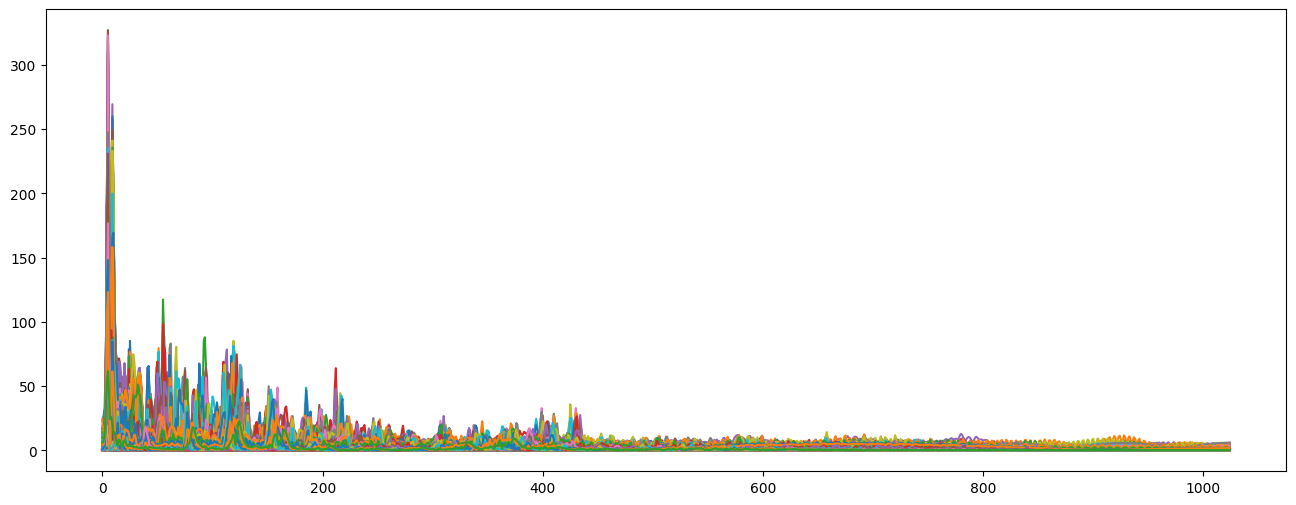

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D)

**The Spectrogram**

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams (wiki).
Here we convert the frequency axis to a logarithmic one.

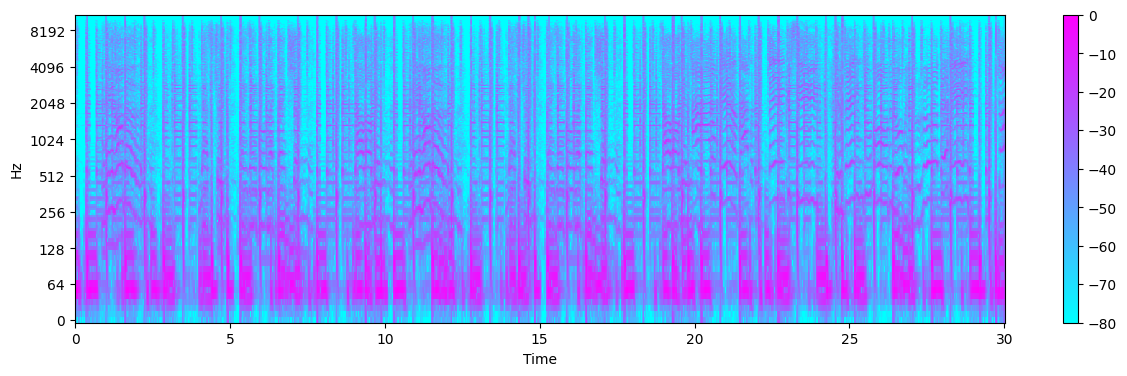

In [ ]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
DB = librosa.amplitude_to_db(D,ref=np.max)
# Creating the Spectogram
plt.figure(figsize=(15,4))
librosa.display.specshow(DB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log', cmap = 'cool')
plt.colorbar()

**Mel Spectrogram**

The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. The Mel Spectrogram is a normal Spectrogram, but with a Mel Scale on the y axis.

Text(0.5, 1.0, 'Metal Mel Spectrogram')

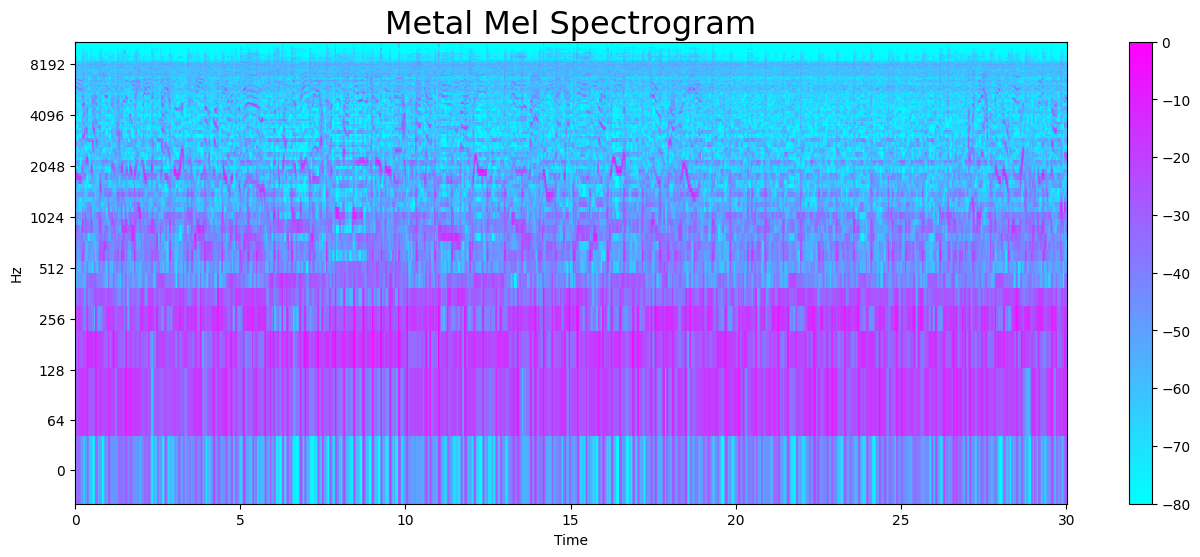

In [ ]:
y,sr = librosa.load(f'{general_path}/genres_original/metal/metal.00050.wav')
y,_ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23)

Text(0.5, 1.0, 'Classical Mel Spectrogram')

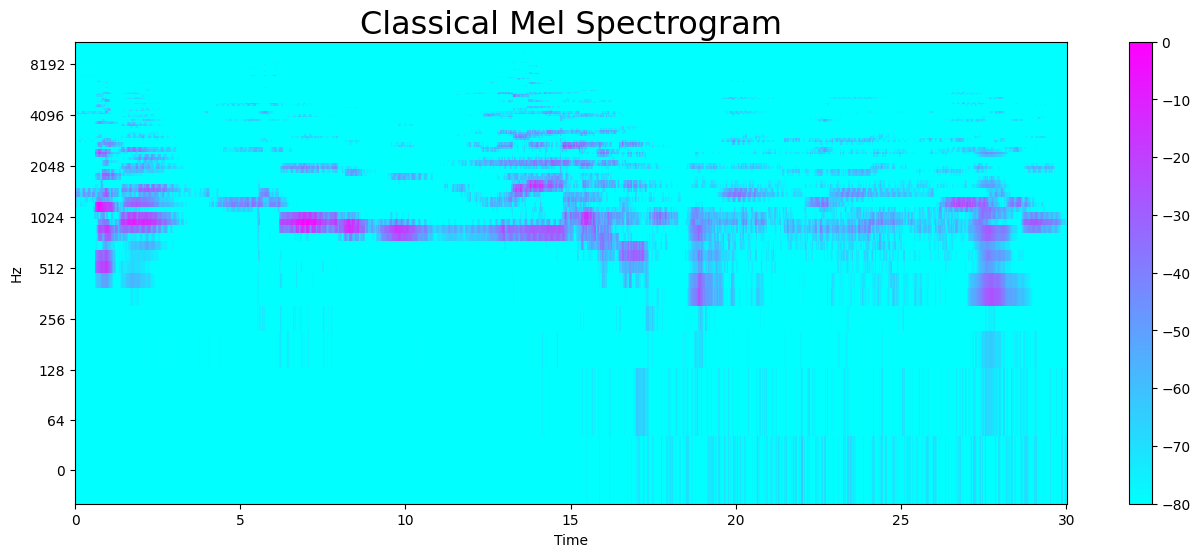

In [ ]:
y,sr = librosa.load(f'{general_path}/genres_original/classical/classical.00036.wav')
y,_ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB=librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')
plt.colorbar()
plt.title("Classical Mel Spectrogram", fontsize = 23)

**Exploratory data analysis**

EDA is going to be performed on the features_30_sec.csv.

So, the table has a final of 1000 rows (10 genres x 100 audio files) and 60 features (dimensionalities).

<ipython-input-26-f08a830d0d17>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');


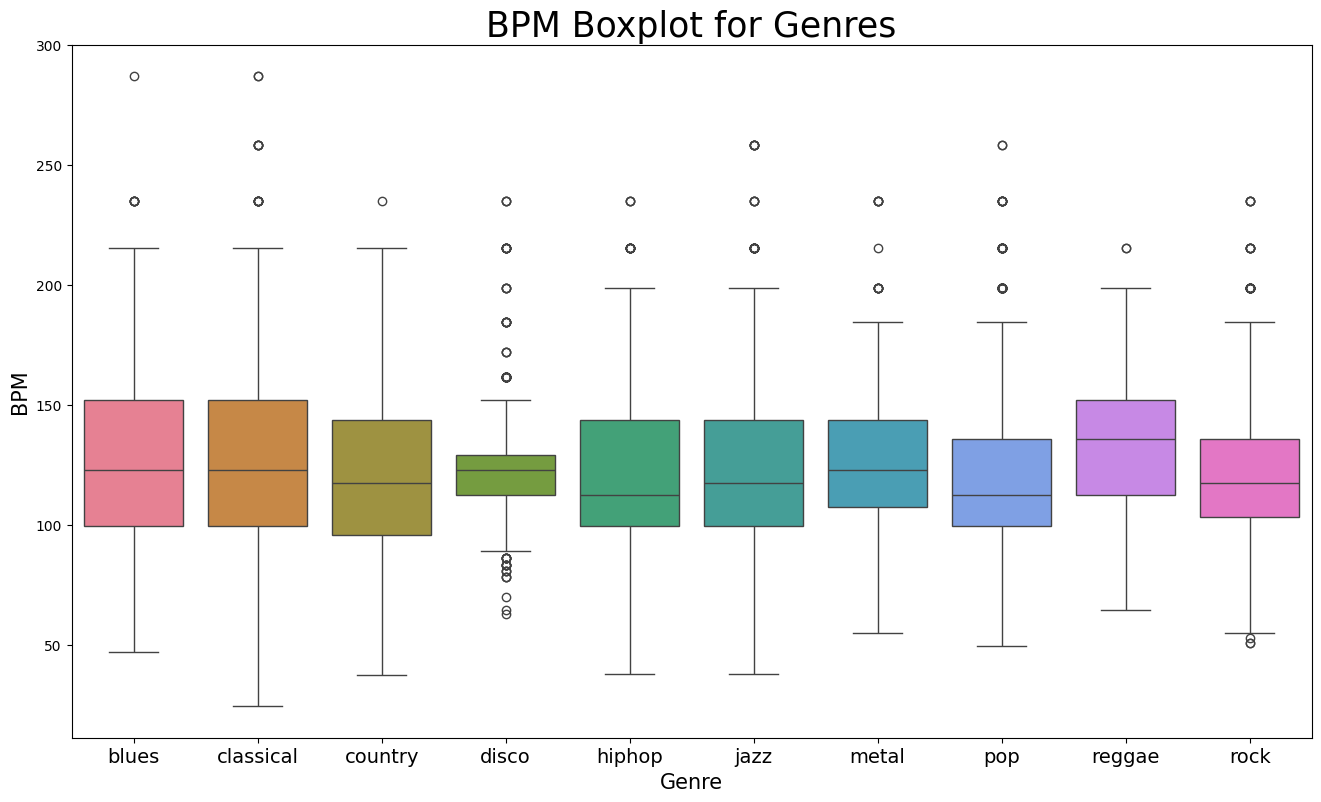

In [ ]:
x=dataset[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

**Principal Component Analysis** - to visualize possible groups of genres:

1. Normalization
2. PCA
3. The Scatter Plot

In [ ]:
from sklearn import preprocessing

dataset = dataset.iloc[0:, 1:]
y = dataset['label']
X = dataset.loc[:, dataset.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.26745621, 0.18238003])

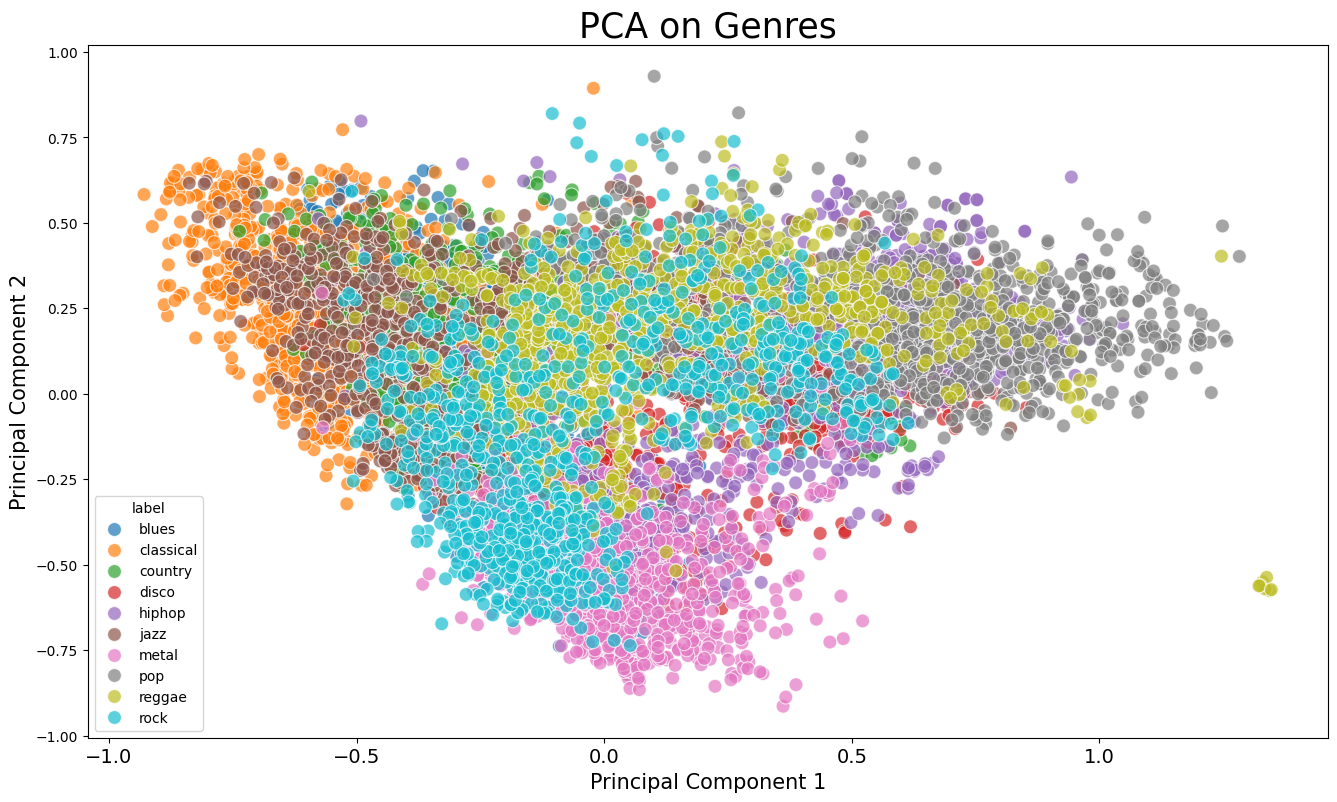

In [ ]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# **DATA PREPROCESSING**


In [ ]:
y = dataset['label']
X = dataset.loc[:, dataset.columns != 'label']

**SPLITTING AND NORMALIZING TRAIN DATA**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# cols = X_train.columns

min_max_scaler = preprocessing.MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)

X_test_normalized = min_max_scaler.fit_transform(X_test)

# X_train_normalized = pd.DataFrame(np_scaled_train, columns = cols)

# X_test_normalized = pd.DataFrame(np_scaled_test, columns = cols)

**ONE HOT ENCODING LABEL**

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# **MACHINE LEARNING MODELLING `3-sec-features`**


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
def model_assess(model, title = "Default"):
    model.fit(X_train_normalized, y_train_encoded)
    preds = model.predict(X_test_normalized)
    print(title,'\n')
    print('confusion matrix:','\n', multilabel_confusion_matrix(y_test_encoded, preds)[0],'\n')
    print('Accuracy: ', round(accuracy_score(y_test_encoded, preds), 5))

In [ ]:
nb = GaussianNB()
model_assess(nb, "Naive Bayes Algorithm")

Naive Bayes Algorithm 

confusion matrix: 
 [[2435  243]
 [ 174  145]] 

Accuracy:  0.49249


In [ ]:
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

Decission trees 

confusion matrix: 
 [[2537  141]
 [ 197  122]] 


Accuracy:  0.47047


In [ ]:
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

Random Forest 

confusion matrix: 
 [[2649   29]
 [  98  221]] 


Accuracy:  0.75642


In [ ]:
lr = LogisticRegression(max_iter=2000,penalty=None)
model_assess(lr,"LogisticRegression")

LogisticRegression 

confusion matrix: 
 [[2672    6]
 [ 270   49]] 


Accuracy:  0.62362


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
sv = SVC()
model_assess(sv,"support vector machine")

support vector machine 

confusion matrix: 
 [[2620   58]
 [ 147  172]] 


Accuracy:  0.68936


In [ ]:
model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05, objective='multi:softmax', num_class=len(label_encoder.classes_))
model_assess(model, "xg-boost")

xg-boost 

confusion matrix: 
 [[2666   12]
 [ 108  211]] 


Accuracy:  0.78011


**RESULTS FOR 3 SEC FEATURES:**

--> xg-boost gives the best results with `accuracy` of `78.011%`

--> random forest gave significantly great result with `accuracy` of `75.64%`

## **PERFORMING ON 30-sec-features**

**VISUALIZING 30 SEC FEATURE DATASET**

In [ ]:
dataset_30 = pd.read_csv("songGenre-Dataset/features_30_sec.csv")

In [ ]:
dataset_30 = dataset_30.iloc[0:, 1:]

In [ ]:
dataset_30.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [ ]:
dataset_30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [ ]:
dataset_30.shape

(1000, 60)

**PREPROCESSING THE DATA**

In [ ]:
y_30 = dataset_30['label']
X_30 = dataset_30.loc[:, dataset_30.columns != 'label']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_30, y_30, test_size=0.3, random_state=42)

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train_normalized_30sec = min_max_scaler.fit_transform(X_train)

X_test_normalized_30sec = min_max_scaler.fit_transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded_30 = label_encoder.fit_transform(y_train)
y_test_encoded_30 = label_encoder.transform(y_test)

In [ ]:
def model_assess_30(model, title = "Default"):
    model.fit(X_train_normalized_30sec, y_train_encoded_30)
    preds = model.predict(X_test_normalized_30sec)
    print(title,'\n')
    print('confusion matrix:','\n', multilabel_confusion_matrix(y_test_encoded_30, preds)[0],'\n')
    print('Accuracy: ', round(accuracy_score(y_test_encoded_30, preds)*100),'%')

**FITTING ML MODELS**

In [ ]:
nb = GaussianNB()
model_assess_30(nb, "Naive Bayes Algorithm")


Naive Bayes Algorithm 

confusion matrix: 
 [[265   0]
 [ 35   0]] 

Accuracy:  15 %


In [ ]:
tree = DecisionTreeClassifier()
model_assess_30(tree, "Decission trees")


Decission trees 

confusion matrix: 
 [[232  33]
 [ 24  11]] 

Accuracy:  32 %


In [ ]:

rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess_30(rforest, "Random Forest")


Random Forest 

confusion matrix: 
 [[241  24]
 [ 12  23]] 

Accuracy:  47 %


In [ ]:
lr = LogisticRegression(max_iter=2000,penalty=None)
model_assess_30(lr,"LogisticRegression")


LogisticRegression 

confusion matrix: 
 [[264   1]
 [ 32   3]] 

Accuracy:  37 %


In [ ]:
sv = SVC()
model_assess_30(sv,"support vector machine")

support vector machine 

confusion matrix: 
 [[242  23]
 [ 17  18]] 

Accuracy:  55 %


In [ ]:
model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05, objective='multi:softmax', num_class=len(label_encoder.classes_))
model_assess_30(model, "xg-boost")

xg-boost 

confusion matrix: 
 [[234  31]
 [ 14  21]] 

Accuracy:  46 %


**RESULTS FOR 30-SEC-FEATURES**

--> svc classifier gives the highest `accuracy` - 55%